# Import Libraries

In [1]:
import pandas as pd
import numpy as np

# Read Solar Energy Production Dataset

In [168]:
data = pd.read_csv('F:\APU\FYP\Dataset\Cleaned_data\solar_production_dataset.csv')

data.head()

,Country,Date,Value,Daylight,Temperature,GHI,DNI
0,Australia,2023-03-01,4055.6634,734.69403,26.204160,894897.94,693884.56
1,Australia,2023-02-01,4466.4801,778.22370,27.318323,997130.10,756902.75
2,Australia,2023-01-01,4967.0119,812.18915,27.128540,1009778.60,739408.44
3,Australia,2022-12-01,5179.1465,822.62040,26.521873,1087540.60,817223.80
4,Australia,2022-11-01,4548.5315,801.65320,23.784800,1055200.00,791037.10


## Extract Data for each country

In [169]:
countries = data['Country'].unique()

solar_production_data = {}

# use loc() function to select data from a DataFrame based on specified row and column labels or conditions.
# Iterate over the countries
for country in countries:
    # Filter the data for the current country and 'solar' product
    country_energy_production = data.loc[
        (data['Country'] == country), ['Date', 'Value', 'Daylight', 'Temperature', 'GHI', 'DNI']
    ]
    
    # Store the filtered data in the dictionary
    solar_production_data[country] = country_energy_production.reset_index(drop=True)

solar_production_data['United States']

,Date,Value,Daylight,Temperature,GHI,DNI
0,2023-03-01,16000.6755,716.66820,2.524250,626652.60,400946.44
1,2023-02-01,12234.9649,624.11270,-0.202308,449535.70,297899.50
2,2023-01-01,10617.7127,547.05975,-0.250316,295995.56,182873.19
3,2022-12-01,9172.6849,519.82030,-1.304255,257026.61,158672.78
4,2022-11-01,11021.7442,568.39844,2.974591,340440.75,229311.53
...,...,...,...,...,...,...
154,2010-05-01,516.9280,899.57104,13.959126,941968.75,639459.20
155,2010-04-01,367.8190,813.55660,9.468004,842650.90,577265.80
156,2010-03-01,239.1480,717.17520,3.248069,641979.80,435734.78
157,2010-02-01,101.2540,624.59680,-2.052028,437165.00,265930.12


# Model Building

In [4]:
import matplotlib.pyplot as plt

## United States Solar Energy Generation

In [150]:
data = solar_production_data['United States']

data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date').sort_index()

print(data.head())
print(data.shape)

              Value   Daylight  Temperature        GHI        DNI
Date                                                             
2010-01-01   28.868  547.38530    -3.459120  309187.84  192351.31
2010-02-01  101.254  624.59680    -2.052028  437165.00  265930.12
2010-03-01  239.148  717.17520     3.248069  641979.80  435734.78
2010-04-01  367.819  813.55660     9.468004  842650.90  577265.80
2010-05-01  516.928  899.57104    13.959126  941968.75  639459.20
(159, 5)


### Split train and test data

In [151]:
# Split the data into training and testing sets
split_date = '2021-01-01'
train, test = data[:split_date], data[split_date:]

print(train.head())
print(train.shape)
print()
print(test.head())
print(test.shape)

              Value   Daylight  Temperature        GHI        DNI
Date                                                             
2010-01-01   28.868  547.38530    -3.459120  309187.84  192351.31
2010-02-01  101.254  624.59680    -2.052028  437165.00  265930.12
2010-03-01  239.148  717.17520     3.248069  641979.80  435734.78
2010-04-01  367.819  813.55660     9.468004  842650.90  577265.80
2010-05-01  516.928  899.57104    13.959126  941968.75  639459.20
(133, 5)

                 Value   Daylight  Temperature        GHI        DNI
Date                                                                
2021-01-01   7482.6709  548.05870    -0.691467  307064.94  196205.69
2021-02-01   8474.3001  625.57420    -3.262407  440591.16  285646.72
2021-03-01  12157.4705  718.21234     4.241629  653438.30  453067.06
2021-04-01  14199.2023  814.55750     8.784806  848140.06  591864.10
2021-05-01  16200.8218  900.36145    14.229197  928026.25  630795.40
(27, 5)


## Univariate Model - ARIMA - Monthly

In [7]:
from statsmodels.tsa.arima.model import ARIMA

The developer has use R with the auto.arima() function to identify the p, q, d value of the best fit ARIMA model for this dataset, the result shows that the order(p, q, d) = (0,1,1)(1,1,0)[12] 

Figure below show the result from R:
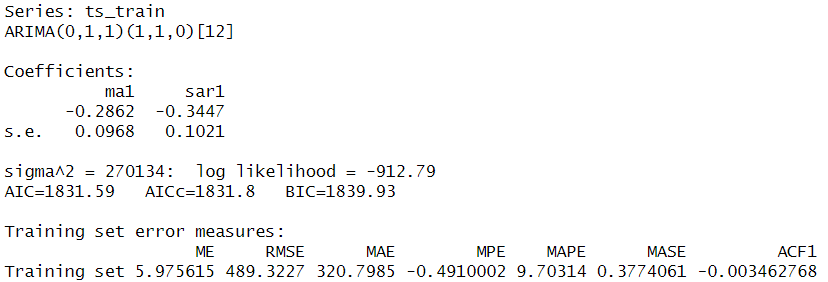

In [154]:
# Create the ARIMA model with the specified order
us_monthly_arima = ARIMA(train['Value'].values, order=(0,1,1), seasonal_order=(1,1,0,12))
# Fit the model to the training data
us_monthly_arima = us_monthly_arima.fit()
print(us_monthly_arima.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  133
Model:             ARIMA(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -927.300
Date:                           Wed, 26 Jul 2023   AIC                           1860.599
Time:                                   09:24:12   BIC                           1868.962
Sample:                                        0   HQIC                          1863.996
                                           - 133                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2001      0.085     -2.359      0.018      -0.366      -0.034
ar.S.L12      -0.4460      0.081     -5.501

In [155]:
# Generate predictions
predictions = us_monthly_arima.predict(start=len(train), end=len(train) + len(test) - 1)

# Evaluate the model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

print("Mean Absolute Error: ", mean_absolute_error(predictions, test['Value'].values))
mse = mean_squared_error(predictions, test['Value'].values)
print("Mean Squared Error: ", mse)
import math
print("Root Mean Squared Error: ", math.sqrt(mse))

Mean Absolute Error:  3179.150598587562
Mean Squared Error:  14866265.922360394
Root Mean Squared Error:  3855.679696546433


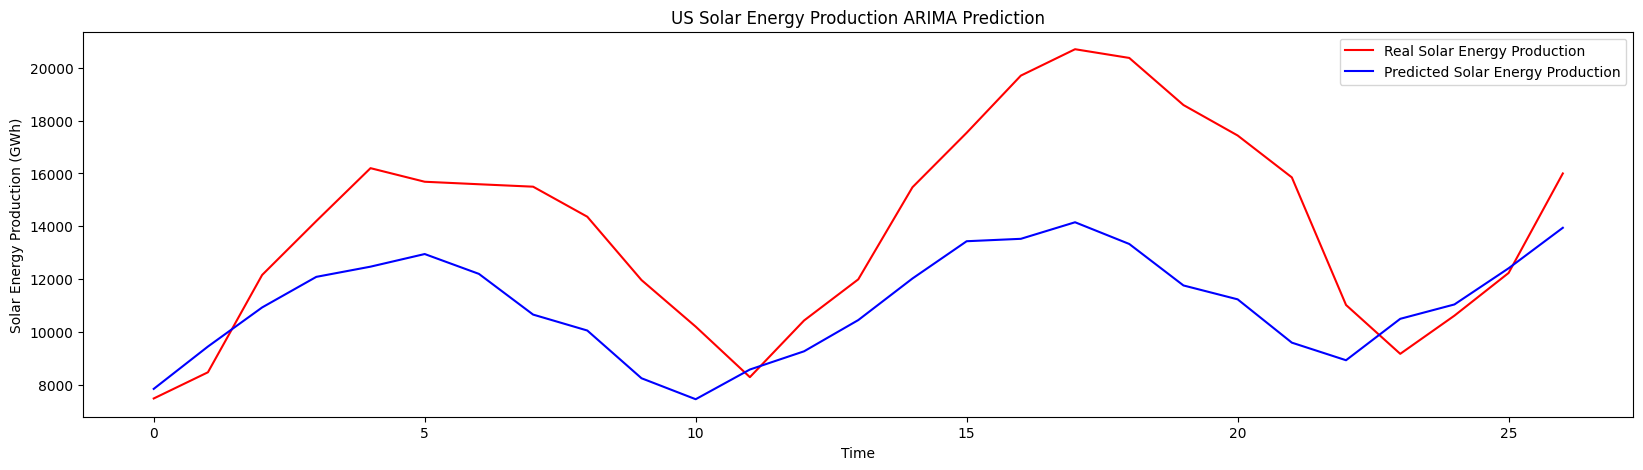

In [156]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(test['Value'].values, color = 'red', label = 'Real Solar Energy Production')
plt.plot(predictions, color = 'blue', label = 'Predicted Solar Energy Production')
plt.title('US Solar Energy Production ARIMA Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy Production (GWh)')
plt.legend()
plt.show()

## SVM - Univariate

In [11]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train[['Value']].values)
test_scaled = scaler.transform(test[['Value']].values)

# Reshape the input data
time_steps = 12  # Define the number of previous time steps to consider

# Creating a data structure with 12 timestamps and 1 output
x_train = []
y_train = []
for i in range(time_steps, len(train)):
    x_train.append(train_scaled[i-time_steps:i, 0])
    y_train.append(train_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

print(x_train.shape, y_train.shape)

(121, 12) (121,)


In [13]:
# Build and Train the SVM Model
us_monthly_svr = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05) # Specify desired hyperparameters
us_monthly_svr.fit(x_train, y_train)

SVR(C=10, epsilon=0.05, gamma=0.5)

In [14]:
dataset_total = pd.concat((train['Value'], test['Value']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 12:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
x_test = []
for i in range(time_steps, len(test)+time_steps):
    x_test.append(inputs[i-time_steps:i, 0])
x_test = np.array(x_test)

# Predict Solar Energy Production
y_pred = us_monthly_svr.predict(x_test).reshape(-1,1)
y_pred = scaler.inverse_transform(y_pred)
print(y_pred.shape)

(27, 1)


In [15]:
# Evaluate the model
print("Mean Absolute Error: ", mean_absolute_error(y_pred, test['Value'].values))
mse = mean_squared_error(y_pred, test['Value'].values)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ",math.sqrt(mse))

Mean Absolute Error:  6264.981883930008
Mean Squared Error:  54173447.523391925
Root Mean Squared Error:  7360.261376024083


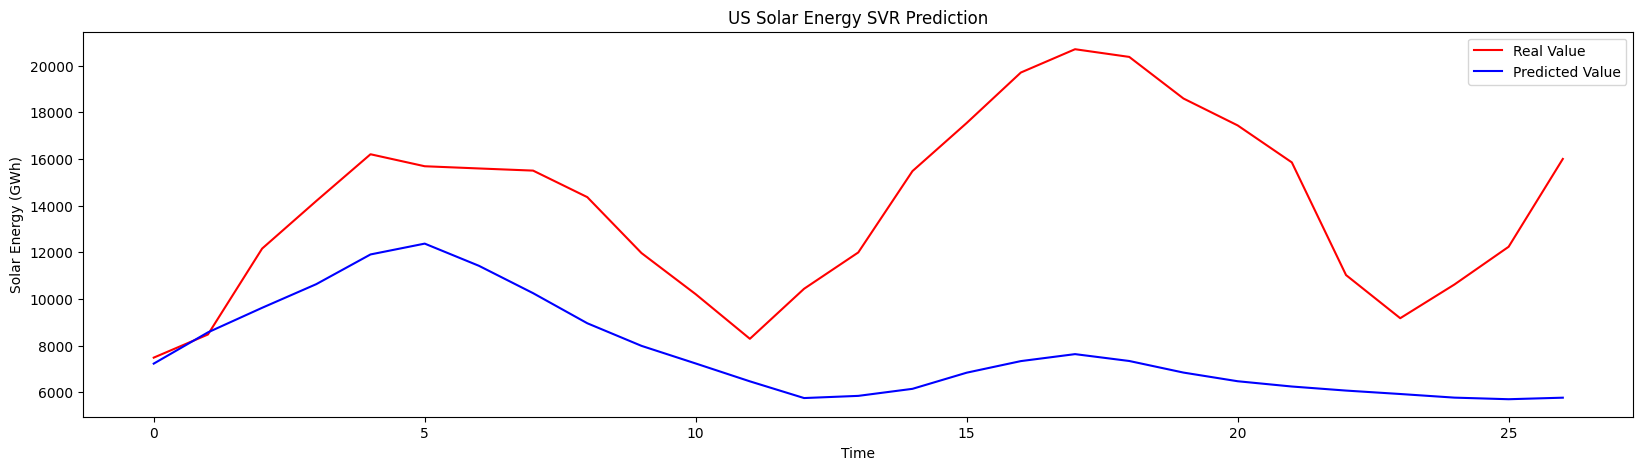

In [16]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(test['Value'].values, color='red', label='Real Value')
plt.plot(y_pred, color='blue', label='Predicted Value')
plt.title('US Solar Energy SVR Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy (GWh)')
plt.legend()
plt.show()

## Univariate GRU - Monthly

In [17]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train[['Value']].values)

In [18]:
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

# Set the number of time steps (input sequence length)
time_steps = 12

# Create the training datasets
X_train, y_train = create_dataset(training_set_scaled, time_steps)

# Create the testing datasets
X_test, y_test = create_dataset(test['Value'].values, time_steps)

In [19]:
from keras.models import Sequential
from keras.layers import GRU, Dense

# Create the model
us_monthly_gru = Sequential()
us_monthly_gru.add(GRU(units=64, return_sequences=True, input_shape=(time_steps, 1)))
us_monthly_gru.add(GRU(units=64, input_shape=(time_steps, 1)))
us_monthly_gru.add(Dense(1, activation='linear'))

us_monthly_gru.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
us_monthly_gru.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
4/4 [==============================] - 10s 15ms/step - loss: 0.1355
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0346
Epoch 3/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0402
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0264
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0189
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0225
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0200
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0167
Epoch 9/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0170
Epoch 10/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0169
Epoch 11/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0158
Epoch 12/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0157
Epoch 13/100
4/4 [==============================

In [21]:
dataset_total = pd.concat((train['Value'], test['Value']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 12:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(time_steps, len(test)+time_steps):
    X_test.append(inputs[i-time_steps:i, 0])
X_test = np.array(X_test)

predicted_value = us_monthly_gru.predict(X_test)
predicted_value = sc.inverse_transform(predicted_value)

1/1 [==============================] - 2s 2s/step


In [22]:
print("Mean Absolute Error: ", mean_absolute_error(predicted_value, test['Value'].values))
mse = mean_squared_error(predicted_value, test['Value'].values)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ",math.sqrt(mse))

Mean Absolute Error:  2028.7428136284723
Mean Squared Error:  5107666.220038861
Root Mean Squared Error:  2260.01465040359


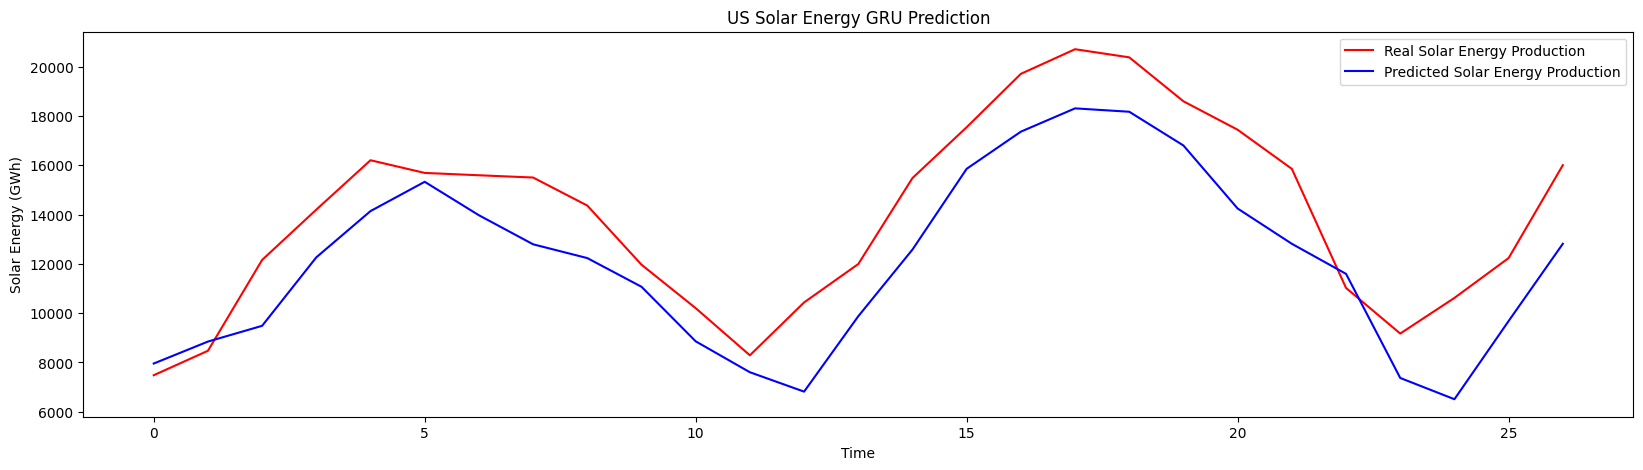

In [23]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(test['Value'].values, color = 'red', label = 'Real Solar Energy Production')
plt.plot(predicted_value, color = 'blue', label = 'Predicted Solar Energy Production')
plt.title('US Solar Energy GRU Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy (GWh)')
plt.legend()
plt.show()

## Univariate LSTM - Monthly

In [24]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train[['Value']].values)
print(training_set_scaled.shape)

(133, 1)


In [25]:
# Creating a data structure with 12 timestamps and 1 output
X_train = []
y_train = []
for i in range(time_steps, len(train)):
    X_train.append(training_set_scaled[i-12:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [26]:
print(X_train.shape)
print(y_train.shape)

(121, 12)
(121,)


In [27]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [28]:
# Building the RNN(LSTM)

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [29]:
# Initialising the RNN
us_monthly_uni_lstm = Sequential()

# Adding the first LSTM layer
us_monthly_uni_lstm.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))

us_monthly_uni_lstm.add(LSTM(units = 64, return_sequences = True))

us_monthly_uni_lstm.add(LSTM(units = 64))

# Adding the output layer
us_monthly_uni_lstm.add(Dense(units = 1))

In [30]:
# Compiling the RNN
us_monthly_uni_lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
us_monthly_uni_lstm.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
4/4 [==============================] - 32s 17ms/step - loss: 0.1845
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0666
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0464
Epoch 4/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0288
Epoch 5/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0322
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0290
Epoch 7/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0205
Epoch 8/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0224
Epoch 9/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0205
Epoch 10/100
4/4 [==============================] - 0s 31ms/step - loss: 0.0205
Epoch 11/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0185
Epoch 12/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0177
Epoch 13/100
4/4 [==============================

In [31]:
dataset_total = pd.concat((train['Value'], test['Value']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 12:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test = []
for i in range(time_steps, len(test)+time_steps):
    X_test.append(inputs[i-time_steps:i, 0])
    y_test.append(inputs[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_value = us_monthly_uni_lstm.predict(X_test)
predicted_value = sc.inverse_transform(predicted_value)

1/1 [==============================] - 5s 5s/step


In [32]:
print("Mean Absolute Error: ", mean_absolute_error(predicted_value, test['Value'].values))
mse = mean_squared_error(predicted_value, test['Value'].values)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ",math.sqrt(mse))

Mean Absolute Error:  7942.676754767073
Mean Squared Error:  74742473.41175489
Root Mean Squared Error:  8645.372948100903


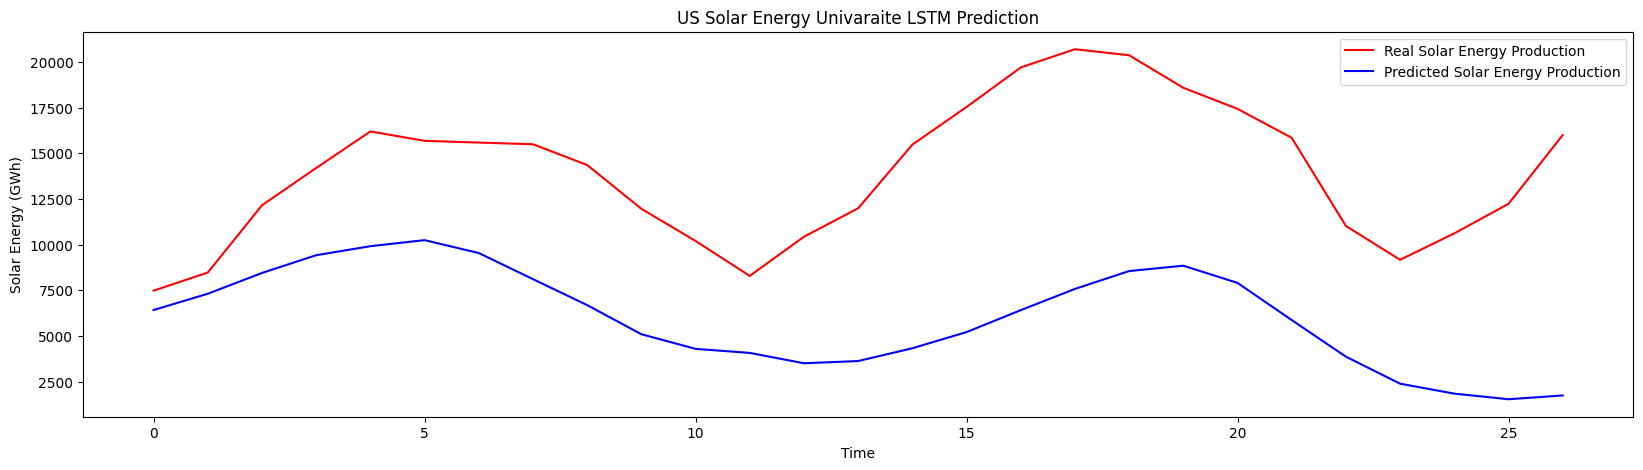

In [33]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(test['Value'].values, color = 'red', label = 'Real Solar Energy Production')
plt.plot(predicted_value, color = 'blue', label = 'Predicted Solar Energy Production')
plt.title('US Solar Energy Univaraite LSTM Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy (GWh)')
plt.legend()
plt.show()

## Multivariate LSTM

In [34]:
data = solar_production_data['United States']

data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date').sort_index()

data.shape

(159, 5)

In [35]:
X = data[['Daylight', 'Temperature', 'GHI', 'DNI', 'Value']]
y = data[['Value']]

X.head()

,Daylight,Temperature,GHI,DNI,Value
Date,,,,,
2010-01-01,547.38530,-3.459120,309187.84,192351.31,28.868
2010-02-01,624.59680,-2.052028,437165.00,265930.12,101.254
2010-03-01,717.17520,3.248069,641979.80,435734.78,239.148
2010-04-01,813.55660,9.468004,842650.90,577265.80,367.819
2010-05-01,899.57104,13.959126,941968.75,639459.20,516.928


In [36]:
# Split the data into training and testing sets
split_date = '2021-01-01'
X_train, X_test = X[:split_date], X[split_date:]
y_train, y_test = y[:split_date], y[split_date:]

print(X_train.shape)
print(X_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(133, 5)
(27, 5)

(133, 1)
(27, 1)


In [37]:
# Scale the features and target variables using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler = MinMaxScaler(feature_range=(0, 1))
X_train, X_test = X_scaler.fit_transform(X_train), X_scaler.transform(X_test)
y_train, y_test = y_scaler.fit_transform(y_train), y_scaler.transform(y_test)

In [38]:
# Reshape the input data to fit the LSTM model (samples, time steps, features)
time_steps = 12  # Define the number of previous time steps to consider
n_features = X_train.shape[1]  # Number of features

# Creating a data structure with 12 timestamps and 1 output
X_train1 = []
y_train1 = []
for i in range(time_steps, len(X_train)):
    X_train1.append(X_train[i-time_steps:i])
    y_train1.append(y_train[i][0])
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)

print(X_train1.shape)

X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], X_train1.shape[2]))

(121, 12, 5)


In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

us_monthly_multi_lstm = Sequential()
us_monthly_multi_lstm.add(LSTM(units = 64, return_sequences = True, input_shape=(time_steps, n_features)))
us_monthly_multi_lstm.add(LSTM(units = 64, return_sequences = True))
us_monthly_multi_lstm.add(LSTM(units = 64))
us_monthly_multi_lstm.add(Dense(1))

us_monthly_multi_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
us_monthly_multi_lstm.fit(X_train1, y_train1, epochs=100, batch_size=32)

Epoch 1/100
4/4 [==============================] - 22s 15ms/step - loss: 0.1510
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0662
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0446
Epoch 4/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0337
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0203
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0243
Epoch 7/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0190
Epoch 8/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0156
Epoch 9/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0155
Epoch 10/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0125
Epoch 11/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0128
Epoch 12/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0106
Epoch 13/100
4/4 [==============================

In [41]:
X_total_data = X
inputs = X_total_data[len(X_total_data) - len(X_test) - 12:]
inputs = X_scaler.transform(inputs)
X_test1 = []
for i in range(time_steps, len(X_test)+time_steps):
    X_test1.append(inputs[i-time_steps:i])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], X_test1.shape[2]))
predicted_value = us_monthly_multi_lstm.predict(X_test1)
predicted_value = y_scaler.inverse_transform(predicted_value)
real_value = y_scaler.inverse_transform(y_test)

1/1 [==============================] - 5s 5s/step


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean Absolute Error: ", mean_absolute_error(predicted_value, real_value))
mse = mean_squared_error(predicted_value, real_value)
print("Mean Squared Error: ", mse)
import math
print("Root Mean Squared Error: ",math.sqrt(mse))

Mean Absolute Error:  7287.435810575809
Mean Squared Error:  63338640.82429031
Root Mean Squared Error:  7958.557710055907


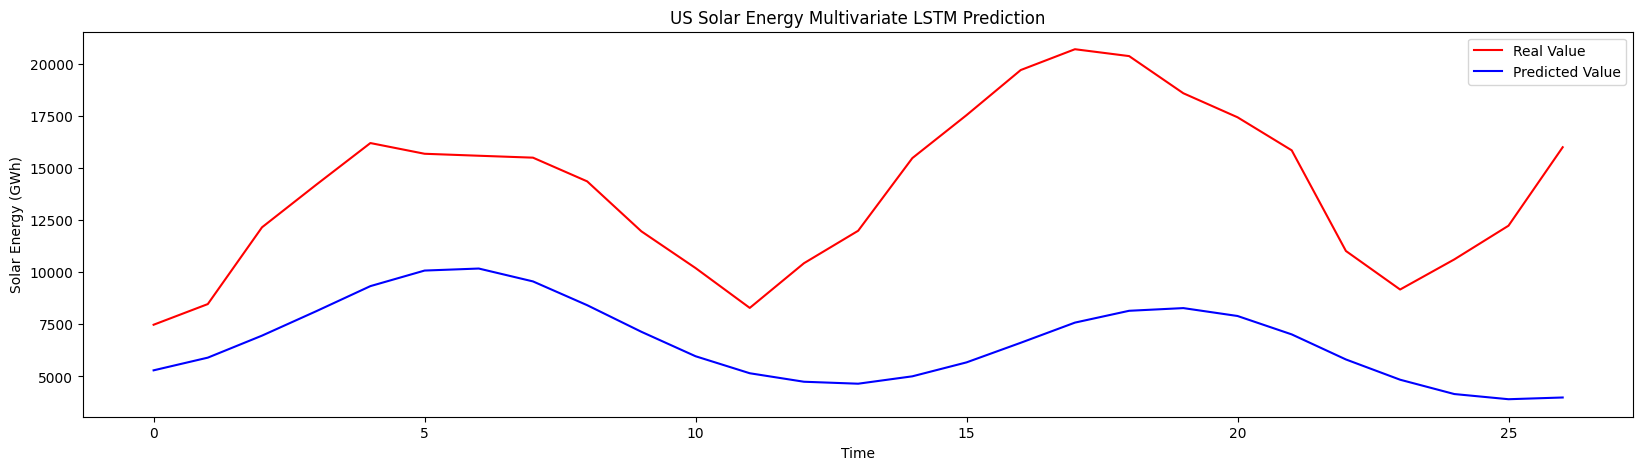

In [43]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(real_value, color='red', label='Real Value')
plt.plot(predicted_value, color='blue', label='Predicted Value')
plt.title('US Solar Energy Multivariate LSTM Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy (GWh)')
plt.legend()
plt.show()

# Resample to daily data

In [170]:
# hypro_production_data
for country_data in solar_production_data:
    
    # set time as the index
    solar_production_data[country_data]['Date'] = pd.to_datetime(solar_production_data[country_data]['Date'])
    solar_production_data[country_data].set_index('Date', inplace=True)
    
    # divide the monthly statistical production value by the number of days 
    # of the month to get the avarage daily production value
    solar_production_data[country_data]['Value'] = (solar_production_data[country_data]['Value']/
                                                    solar_production_data[country_data].index.days_in_month)
    
    # resample the monthly index to daily and impute the missing value with linear interpolate method
    daily_data = solar_production_data[country_data].resample('D').interpolate('linear')
    solar_production_data[country_data] = daily_data
    
solar_production_data['United States']

,Value,Daylight,Temperature,GHI,DNI
Date,,,,,
2010-01-01,0.931226,547.385300,-3.459120,309187.840000,192351.310000
2010-01-02,1.017838,549.875994,-3.413730,313316.135484,194724.820000
2010-01-03,1.104451,552.366687,-3.368339,317444.430968,197098.330000
2010-01-04,1.191063,554.857381,-3.322949,321572.726452,199471.840000
2010-01-05,1.277676,557.348074,-3.277559,325701.021935,201845.350000
...,...,...,...,...,...
2023-02-25,504.838281,703.445986,2.134742,601350.185714,386225.448571
2023-02-26,507.666416,706.751539,2.232119,607675.789286,389905.696429
2023-02-27,510.494552,710.057093,2.329496,614001.392857,393585.944286


In [171]:
solar_daily_production_data = {}

for country in solar_production_data:
    solar_daily_production_data[country] = solar_production_data[country].copy()
    solar_daily_production_data[country] = solar_daily_production_data[country].reset_index()
    solar_daily_production_data[country]['Country'] = country
    solar_daily_production_data[country] = solar_daily_production_data[country][['Country'] + list(solar_daily_production_data[country].columns[:-1])]
    
# Concatenate the datasets into a single DataFrame
solar_dataset = pd.concat(solar_daily_production_data.values())
# Reset the index of the concatenated DataFrame
solar_dataset.reset_index(drop=True, inplace=True)

# Save the concatenated DataFrame to a CSV file
solar_dataset.to_csv('F:\APU\FYP\Dataset\Cleaned_data\solar_daily_production_dataset.csv', index=False)

# Model Building

### Split train and test data

In [159]:
data = solar_production_data['United States']

# Split the data into training and testing sets
split_date = '2021-01-01'
train, test = data[:split_date][['Value']], data[split_date:][['Value']]

print(train.head())
print(train.shape)
print()
print(test.head())
print(test.shape)

               Value
Date                
2010-01-01  0.931226
2010-01-02  1.017838
2010-01-03  1.104451
2010-01-04  1.191063
2010-01-05  1.277676
(4019, 1)

                 Value
Date                  
2021-01-01  241.376481
2021-01-02  243.353161
2021-01-03  245.329842
2021-01-04  247.306522
2021-01-05  249.283202
(790, 1)


## Univariate Model - ARIMA - Daily

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

#### The developer has use R with the auto.arima() function to identify the p, q, d value of the best fit ARIMA model for this dataset, the result shows that the order(p, q, d) = (1,1,0)(0,1,0)[365] 

#### Figure below show the result from R:
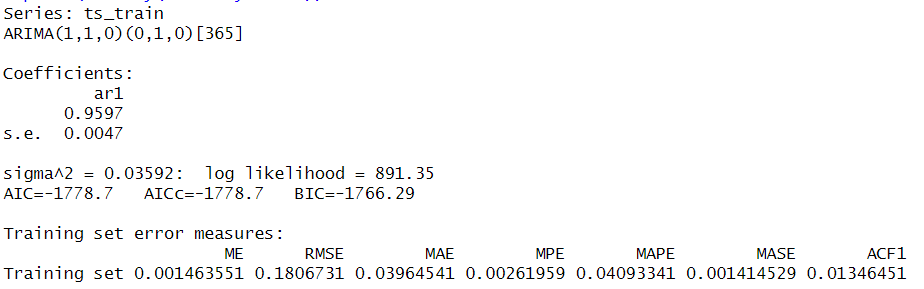

In [160]:
import rpy2.robjects as robjects
# Load the 'forecast' R package
robjects.r("library(forecast)")

# Load the ARIMA model
r_load = robjects.r['readRDS']
us_solar_arima_model = r_load(r"F:\APU\FYP\SEM 2\Report Doc\R script\us_solar_arima_model.rds")

R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: package 'forecast' was built under R version 4.1.3 



In [161]:
# Generate predictions
r_forecast = robjects.r['forecast']
predictions = r_forecast(us_solar_arima_model, h=len(test))

# Evaluate the model performance
print("Mean Absolute Error: ", mean_absolute_error(predictions.rx('mean')[0], test.values))
mse = mean_squared_error(predictions.rx('mean')[0], test.values)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", math.sqrt(mse))

Mean Absolute Error:  57.78038634000845
Mean Squared Error:  6215.1865409442535
Root Mean Squared Error:  78.83645439100019


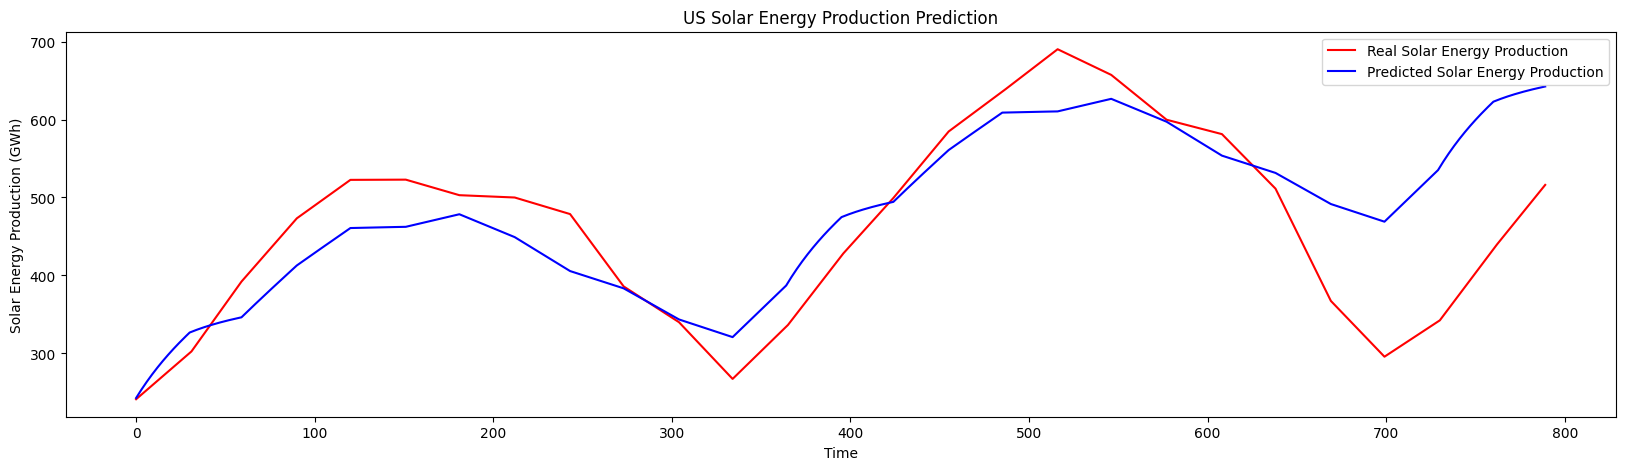

In [163]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(test.values, color = 'red', label = 'Real Solar Energy Production')
plt.plot(predictions.rx('mean')[0], color = 'blue', label = 'Predicted Solar Energy Production')
plt.title('US Solar Energy Production Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy Production (GWh)')
plt.legend()
plt.show()

## SVM - Univariate

In [50]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [172]:
# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train[['Value']].values)
test_scaled = scaler.transform(test[['Value']].values)

# Reshape the input data
time_steps = 365  # Define the number of previous time steps to consider

# Creating a data structure with 365 timestamps and 1 output
x_train = []
y_train = []
for i in range(time_steps, len(train)):
    x_train.append(train_scaled[i-time_steps:i, 0])
    y_train.append(train_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

print(x_train.shape, y_train.shape)

(3654, 365) (3654,)


In [102]:
# Build and Train the SVM Model
us_daily_svr = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05) # Specify hyperparameters
us_daily_svr.fit(x_train, y_train)

SVR(C=10, epsilon=0.05, gamma=0.5)

In [173]:
dataset_total = pd.concat((train['Value'], test['Value']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 365:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
x_test = []
for i in range(time_steps, len(test)+time_steps):
    x_test.append(inputs[i-time_steps:i, 0])
x_test = np.array(x_test)

# Predict Solar Energy Production
svr_y_pred = us_daily_svr.predict(x_test).reshape(-1,1)
svr_y_pred = scaler.inverse_transform(svr_y_pred)
print(svr_y_pred.shape)

(790, 1)


In [174]:
print(inputs)

[[0.41223019]
 [0.41651472]
 [0.42079925]
 ...
 [1.41328541]
 [1.42112931]
 [1.42897321]]


In [175]:
# Evaluate the model
print("Mean Absolute Error: ", mean_absolute_error(y_pred, test['Value'].values))
mse = mean_squared_error(svr_y_pred, test['Value'].values)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ",math.sqrt(mse))

Mean Absolute Error:  256.80366100629954
Mean Squared Error:  79672.59010223339
Root Mean Squared Error:  282.26333467567724


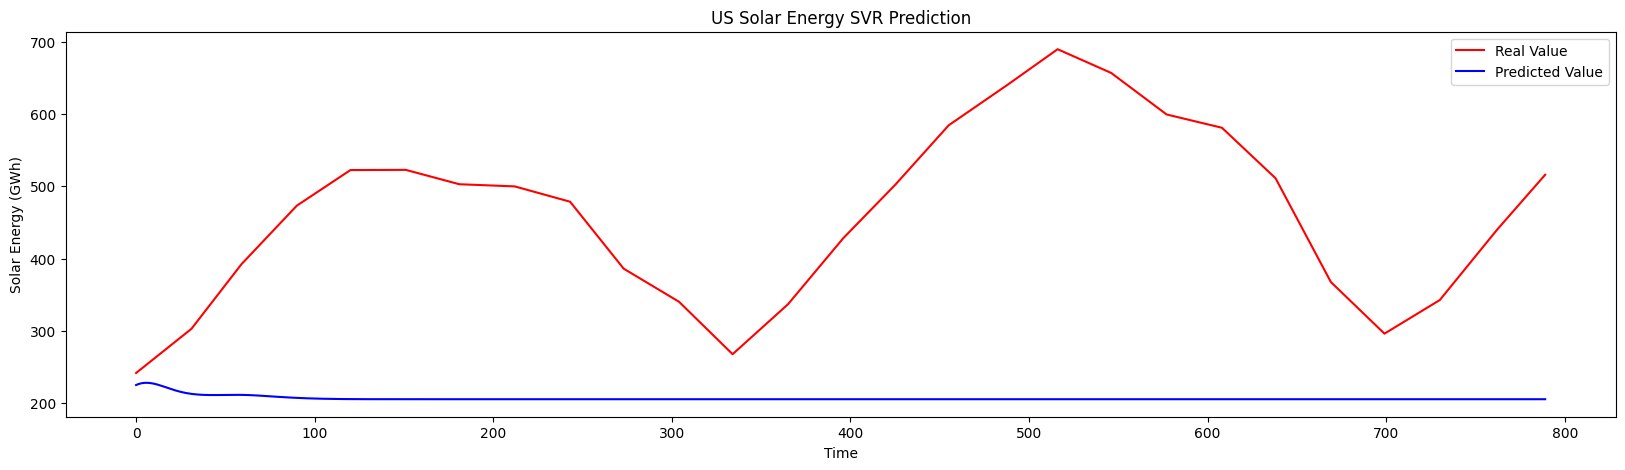

In [176]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(test['Value'].values, color='red', label='Real Value')
plt.plot(svr_y_pred, color='blue', label='Predicted Value')
plt.title('US Solar Energy SVR Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy (GWh)')
plt.legend()
plt.show()

## Univariate GRU - Daily

In [177]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train[['Value']].values)

In [178]:
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

# Set the number of time steps (input sequence length)
time_steps = 365

# Create the training datasets
X_train, y_train = create_dataset(training_set_scaled, time_steps)

# Create the testing datasets
X_test, y_test = create_dataset(test['Value'].values, time_steps)

In [59]:
from keras.models import Sequential
from keras.layers import GRU, Dense

# Create the model
us_daily_gru = Sequential()
us_daily_gru.add(GRU(units=64, return_sequences=True, input_shape=(time_steps, 1)))
us_daily_gru.add(GRU(units=64))
us_daily_gru.add(Dense(1, activation='linear'))

us_daily_gru.compile(optimizer='adam', loss='mean_squared_error')

In [60]:
us_daily_gru.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
115/115 [==============================] - 46s 295ms/step - loss: 0.0074
Epoch 2/100
115/115 [==============================] - 36s 315ms/step - loss: 6.2273e-05
Epoch 3/100
115/115 [==============================] - 36s 313ms/step - loss: 4.9605e-05
Epoch 4/100
115/115 [==============================] - 32s 281ms/step - loss: 3.9611e-05
Epoch 5/100
115/115 [==============================] - 28s 240ms/step - loss: 3.2913e-05
Epoch 6/100
115/115 [==============================] - 36s 310ms/step - loss: 2.5649e-05
Epoch 7/100
115/115 [==============================] - 33s 289ms/step - loss: 1.7145e-05
Epoch 8/100
115/115 [==============================] - 33s 288ms/step - loss: 1.3951e-05
Epoch 9/100
115/115 [==============================] - 32s 275ms/step - loss: 1.1725e-05
Epoch 10/100
115/115 [==============================] - 32s 273ms/step - loss: 9.7511e-06
Epoch 11/100
115/115 [==============================] - 34s 294ms/step - loss: 8.6934e-06
Epoch 12/100
115/115 [=

In [179]:
# Getting the predicted value
dataset_total = pd.concat((train['Value'], test['Value']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 365:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(time_steps, len(test)+time_steps):
    X_test.append(inputs[i-time_steps:i, 0])
X_test = np.array(X_test)

gru_y_pred = us_daily_gru.predict(X_test)
gru_y_pred = sc.inverse_transform(gru_y_pred)

25/25 [==============================] - 19s 242ms/step


In [180]:
print("Mean Absolute Error: ", mean_absolute_error(gru_y_pred, test['Value'].values))
mse = mean_squared_error(gru_y_pred, test['Value'].values)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ",math.sqrt(mse))

Mean Absolute Error:  1.7932324354379534
Mean Squared Error:  7.883834432476318
Root Mean Squared Error:  2.807816666464589


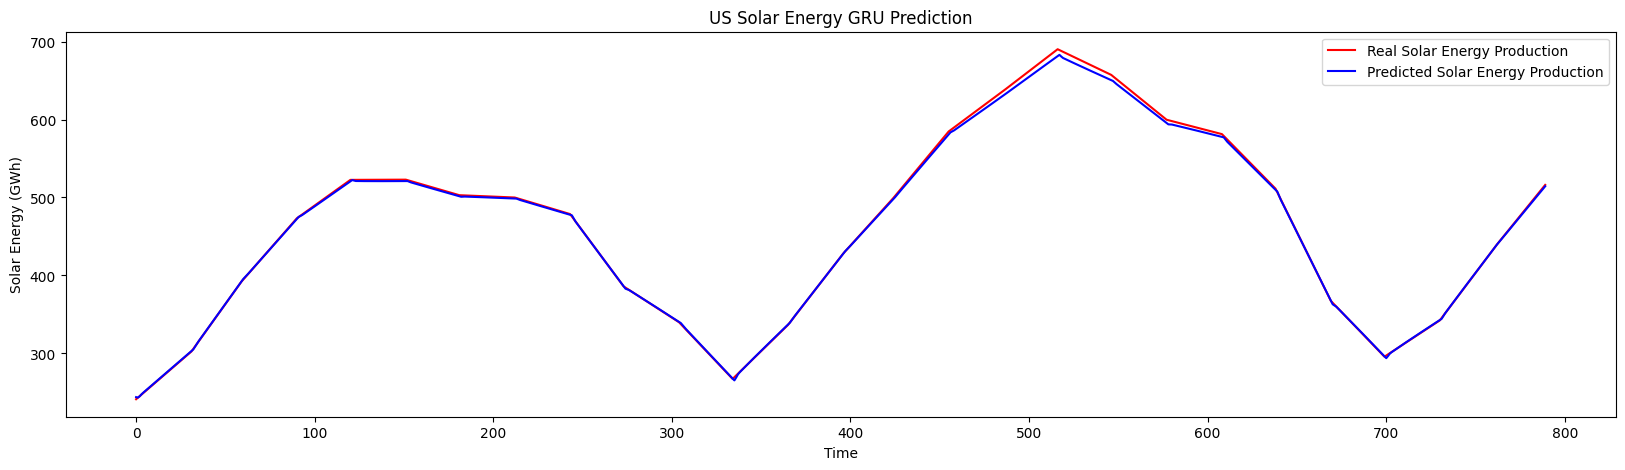

In [181]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(test['Value'].values, color = 'red', label = 'Real Solar Energy Production')
plt.plot(gru_y_pred, color = 'blue', label = 'Predicted Solar Energy Production')
plt.title('US Solar Energy GRU Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy (GWh)')
plt.legend()
plt.show()

## Univariate LSTM - Daily

In [182]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train[['Value']].values)

print(training_set_scaled)
print(training_set_scaled.shape)

[[0.00000000e+00]
 [2.40221816e-04]
 [4.80443632e-04]
 ...
 [6.54650975e-01]
 [6.60765665e-01]
 [6.66880354e-01]]
(4019, 1)


In [183]:
# Creating a data structure with 365 timestamps and 1 output
X_train = []
y_train = []
for i in range(time_steps, len(train)):
    X_train.append(training_set_scaled[i-365:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [184]:
print(X_train)
X_train.shape

[[0.00000000e+00 2.40221816e-04 4.80443632e-04 ... 6.85678863e-03
  6.83778668e-03 6.81878473e-03]
 [2.40221816e-04 4.80443632e-04 7.20665447e-04 ... 6.83778668e-03
  6.81878473e-03 6.79978279e-03]
 [4.80443632e-04 7.20665447e-04 9.60887263e-04 ... 6.81878473e-03
  6.79978279e-03 7.35374188e-03]
 ...
 [4.03981880e-01 4.03661131e-01 4.07945661e-01 ... 6.36306908e-01
  6.42421597e-01 6.48536286e-01]
 [4.03661131e-01 4.07945661e-01 4.12230191e-01 ... 6.42421597e-01
  6.48536286e-01 6.54650975e-01]
 [4.07945661e-01 4.12230191e-01 4.16514721e-01 ... 6.48536286e-01
  6.54650975e-01 6.60765665e-01]]


(3654, 365)

In [185]:
print(y_train)
y_train.shape

[0.00679978 0.00735374 0.0079077  ... 0.65465098 0.66076566 0.66688035]


(3654,)

In [186]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [122]:
# Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [123]:
# Initialising the RNN
us_daily_uni_lstm = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
us_daily_uni_lstm.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
us_daily_uni_lstm.add(Dropout(0.2))

us_daily_uni_lstm.add(LSTM(units = 64, return_sequences = True))
us_daily_uni_lstm.add(Dropout(0.2))

us_daily_uni_lstm.add(LSTM(units = 64))
us_daily_uni_lstm.add(Dropout(0.2))

# Adding the output layer
us_daily_uni_lstm.add(Dense(units = 1))

In [124]:
# Compiling the RNN
us_daily_uni_lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
us_daily_uni_lstm.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
115/115 [==============================] - 202s 1s/step - loss: 0.0089
Epoch 2/100
115/115 [==============================] - 126s 1s/step - loss: 0.0020
Epoch 3/100
115/115 [==============================] - 134s 1s/step - loss: 0.0017
Epoch 4/100
115/115 [==============================] - 138s 1s/step - loss: 0.0017
Epoch 5/100
115/115 [==============================] - 135s 1s/step - loss: 0.0014
Epoch 6/100
115/115 [==============================] - 147s 1s/step - loss: 0.0015
Epoch 7/100
115/115 [==============================] - 134s 1s/step - loss: 0.0012
Epoch 8/100
115/115 [==============================] - 145s 1s/step - loss: 0.0011
Epoch 9/100
115/115 [==============================] - 123s 1s/step - loss: 0.0013
Epoch 10/100
115/115 [==============================] - 122s 1s/step - loss: 0.0012
Epoch 11/100
115/115 [==============================] - 128s 1s/step - loss: 0.0011
Epoch 12/100
115/115 [==============================] - 123s 1s/step - loss: 8.4930e-

115/115 [==============================] - 91s 795ms/step - loss: 4.4893e-04
Epoch 95/100
115/115 [==============================] - 98s 854ms/step - loss: 4.9215e-04
Epoch 96/100
115/115 [==============================] - 92s 804ms/step - loss: 4.4203e-04
Epoch 97/100
115/115 [==============================] - 92s 804ms/step - loss: 4.5724e-04
Epoch 98/100
115/115 [==============================] - 96s 834ms/step - loss: 4.9911e-04
Epoch 99/100
115/115 [==============================] - 98s 851ms/step - loss: 5.0166e-04
Epoch 100/100
115/115 [==============================] - 83s 725ms/step - loss: 4.5247e-04


In [125]:
test[['Value']].shape

(790, 1)

In [187]:
dataset_total = pd.concat((train['Value'], test['Value']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 365:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test = []
for i in range(time_steps, len(test)+time_steps):
    X_test.append(inputs[i-time_steps:i, 0])
    y_test.append(inputs[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
uni_lstm_y_pred = us_daily_uni_lstm.predict(X_test)
uni_lstm_y_pred = sc.inverse_transform(uni_lstm_y_pred)

25/25 [==============================] - 8s 117ms/step


In [188]:
print("Mean Absolute Error: ", mean_absolute_error(uni_lstm_y_pred, test['Value'].values))
mse = mean_squared_error(uni_lstm_y_pred, test['Value'].values)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ",math.sqrt(mse))

Mean Absolute Error:  141.12103512056703
Mean Squared Error:  34267.08084907873
Root Mean Squared Error:  185.11369708662494


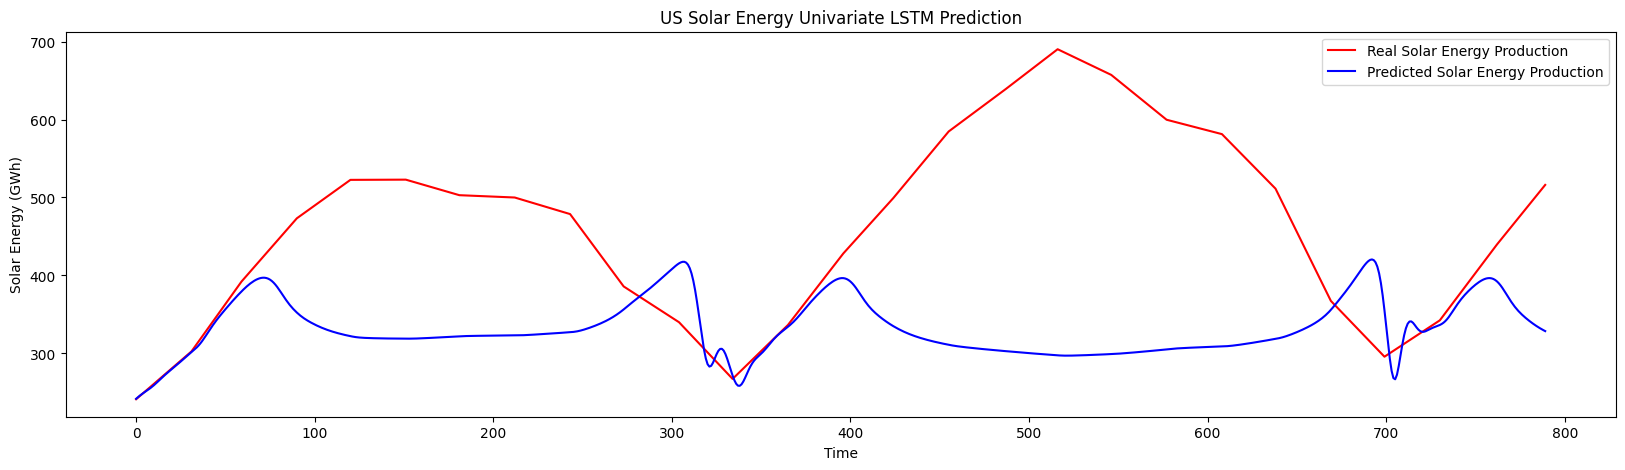

In [189]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(test['Value'].values, color = 'red', label = 'Real Solar Energy Production')
plt.plot(uni_lstm_y_pred, color = 'blue', label = 'Predicted Solar Energy Production')
plt.title('US Solar Energy Univariate LSTM Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy (GWh)')
plt.legend()
plt.show()

## Multivariate LSTM

In [190]:
data = solar_production_data['United States']

data.shape

(4808, 5)

In [191]:
X = data[['Daylight', 'Temperature', 'GHI', 'DNI', 'Value']]
y = data[['Value']]

X.head()

,Daylight,Temperature,GHI,DNI,Value
Date,,,,,
2010-01-01,547.385300,-3.459120,309187.840000,192351.31,0.931226
2010-01-02,549.875994,-3.413730,313316.135484,194724.82,1.017838
2010-01-03,552.366687,-3.368339,317444.430968,197098.33,1.104451
2010-01-04,554.857381,-3.322949,321572.726452,199471.84,1.191063
2010-01-05,557.348074,-3.277559,325701.021935,201845.35,1.277676


In [192]:
# Split the data into training and testing sets
split_date = '2021-01-01'
X_train, X_test = X[:split_date], X[split_date:]
y_train, y_test = y[:split_date], y[split_date:]

In [193]:
# Scale the features and target variables using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler = MinMaxScaler(feature_range=(0, 1))
X_train, X_test = X_scaler.fit_transform(X_train), X_scaler.transform(X_test)
y_train, y_test = y_scaler.fit_transform(y_train), y_scaler.transform(y_test)

In [194]:
print(X_train.shape)
print(X_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(4019, 5)
(790, 5)

(4019, 1)
(790, 1)


In [195]:
# Reshape the input data to fit the LSTM model (samples, time steps, features)
time_steps = 365  # Define the number of previous time steps to consider
n_features = X_train.shape[1]  # Number of features

# Creating a data structure with 365 timestamps and 1 output
X_train1 = []
y_train1 = []
for i in range(time_steps, len(X_train)):
    X_train1.append(X_train[i-time_steps:i])
    y_train1.append(y_train[i][0])
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)

print(X_train1.shape)

(3654, 365, 5)


In [196]:
X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], X_train1.shape[2]))

In [136]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

us_daily_multi_lstm = Sequential()
us_daily_multi_lstm.add(LSTM(units = 64, return_sequences = True, input_shape=(time_steps, n_features)))
us_daily_multi_lstm.add(Dropout(0.2))
us_daily_multi_lstm.add(LSTM(units = 64, activation = 'relu', return_sequences = True))
us_daily_multi_lstm.add(Dropout(0.2))
us_daily_multi_lstm.add(LSTM(units = 64))
us_daily_multi_lstm.add(Dropout(0.2))
us_daily_multi_lstm.add(Dense(1))

In [137]:
us_daily_multi_lstm.compile(optimizer='adam', loss='mean_squared_error')

us_daily_multi_lstm.fit(X_train1, y_train1, epochs=100, batch_size=32)

Epoch 1/100
115/115 [==============================] - 123s 665ms/step - loss: 0.0094
Epoch 2/100
115/115 [==============================] - 83s 726ms/step - loss: 0.0021
Epoch 3/100
115/115 [==============================] - 75s 649ms/step - loss: 0.0019
Epoch 4/100
115/115 [==============================] - 68s 594ms/step - loss: 0.0016
Epoch 5/100
115/115 [==============================] - 75s 653ms/step - loss: 0.0017
Epoch 6/100
115/115 [==============================] - 72s 625ms/step - loss: 0.0014
Epoch 7/100
115/115 [==============================] - 69s 599ms/step - loss: 0.0017
Epoch 8/100
115/115 [==============================] - 73s 633ms/step - loss: 0.0013
Epoch 9/100
115/115 [==============================] - 73s 635ms/step - loss: 0.0015
Epoch 10/100
115/115 [==============================] - 74s 646ms/step - loss: 0.0012
Epoch 11/100
115/115 [==============================] - 70s 612ms/step - loss: 0.0012
Epoch 12/100
115/115 [==============================] - 73s 63

In [197]:
X_total_data = X
inputs = X_total_data[len(X_total_data) - len(X_test) - 365:]
inputs = X_scaler.transform(inputs)
print(inputs.shape)
len(X_test)
X_test1 = []
for i in range(time_steps, len(X_test)+time_steps):
    X_test1.append(inputs[i-time_steps:i])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], X_test1.shape[2]))

multi_lstm_y_pred = us_daily_multi_lstm.predict(X_test1)
multi_lstm_y_pred = y_scaler.inverse_transform(multi_lstm_y_pred)
real_value = y_scaler.inverse_transform(y_test)
hist_value = y_scaler.inverse_transform(y_train)
multi_lstm_y_pred

(1155, 5)
25/25 [==============================] - 7s 114ms/step


array([[241.05473],
       [242.91019],
       [244.91591],
       [247.0433 ],
       [249.24712],
       [251.47281],
       [253.66812],
       [255.79204],
       [257.82016],
       [259.7464 ],
       [261.58127],
       [263.34744],
       [265.0742 ],
       [266.79144],
       [268.52563],
       [270.29626],
       [272.11258],
       [273.98355],
       [275.9013 ],
       [277.85025],
       [279.81198],
       [281.76935],
       [283.7086 ],
       [285.62088],
       [287.50256],
       [289.3545 ],
       [291.18076],
       [292.98743],
       [294.78104],
       [296.56738],
       [298.35077],
       [300.13358],
       [301.91626],
       [303.7482 ],
       [305.7057 ],
       [307.8497 ],
       [310.20706],
       [312.76752],
       [315.48993],
       [318.31454],
       [321.17584],
       [324.0137 ],
       [326.7806 ],
       [329.44482],
       [331.98978],
       [334.41162],
       [336.7156 ],
       [338.91162],
       [341.01123],
       [343.02438],


In [198]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean Absolute Error: ", mean_absolute_error(multi_lstm_y_pred, real_value))
mse = mean_squared_error(multi_lstm_y_pred, real_value)
print("Mean Squared Error: ", mse)
import math
print("Root Mean Squared Error: ",math.sqrt(mse))

Mean Absolute Error:  154.74866573338764
Mean Squared Error:  42796.84005072181
Root Mean Squared Error:  206.8739714191271


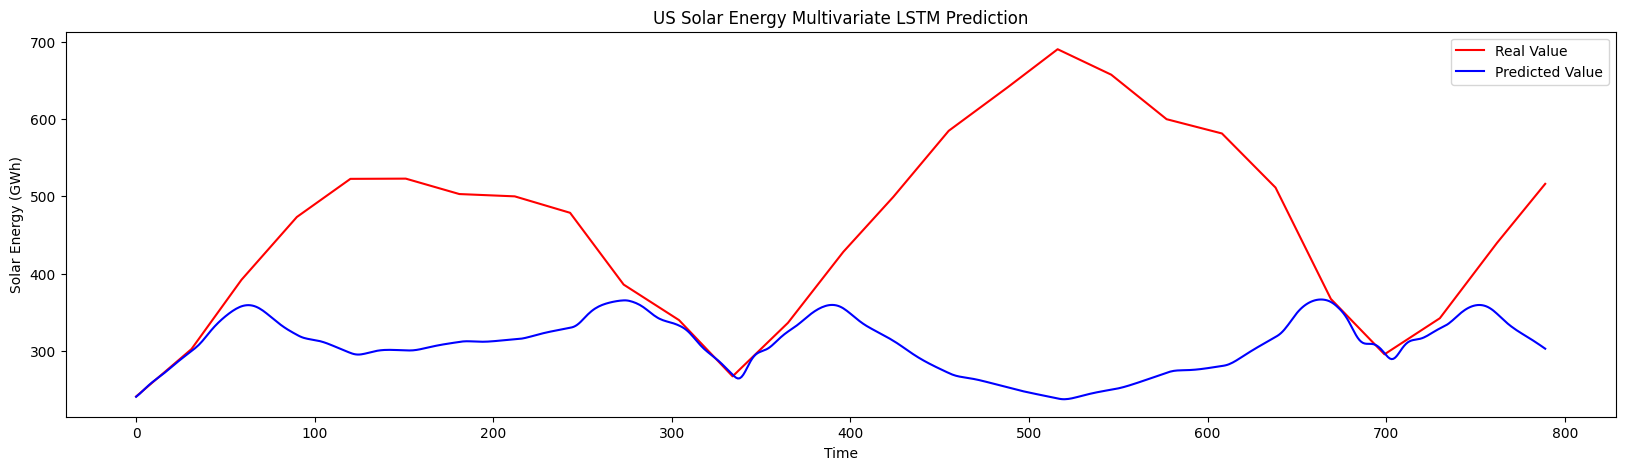

In [199]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(real_value, color='red', label='Real Value')
plt.plot(multi_lstm_y_pred, color='blue', label='Predicted Value')
plt.title('US Solar Energy Multivariate LSTM Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy (GWh)')
plt.legend()
plt.show()

# Discussion:
Based on the finding above, it can show that the model train with daily data are out perform than using monthly data for all the models build.
Therefore, in the folling models build for other countries, the developer will use the daily data to build the time series models.

# Overview

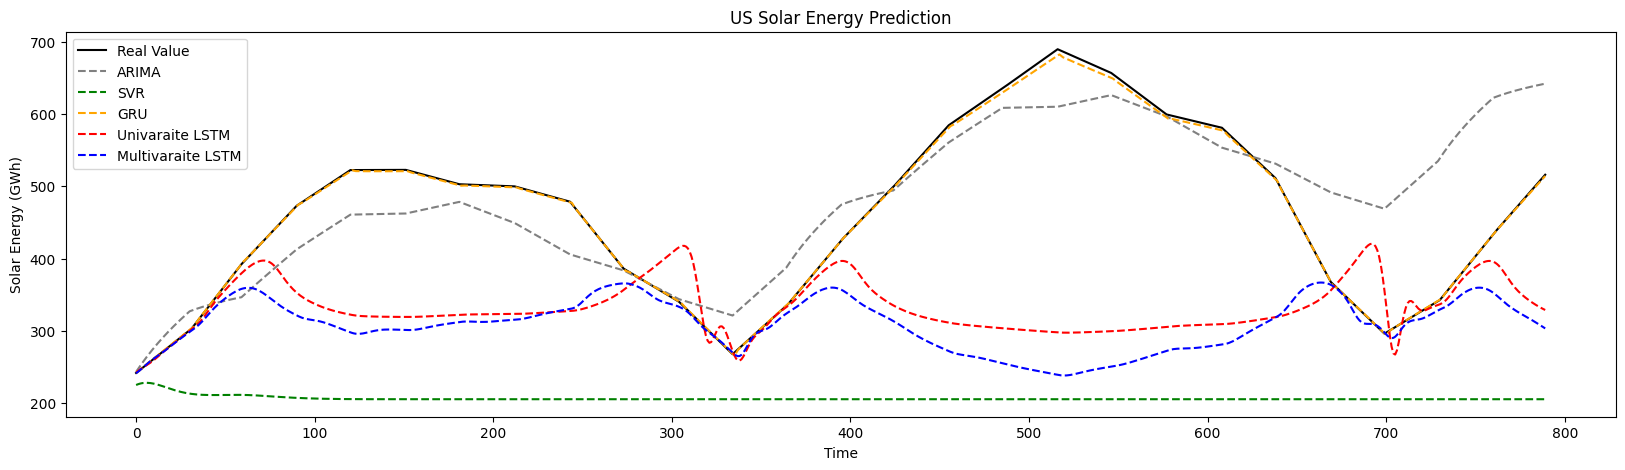

In [200]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(real_value, color='black', label='Real Value')
plt.plot(predictions.rx('mean')[0], color='grey', linestyle='--', label='ARIMA')
plt.plot(svr_y_pred, color='green', linestyle='--', label='SVR')
plt.plot(gru_y_pred, color='orange', linestyle='--', label='GRU')
plt.plot(uni_lstm_y_pred, color='red', linestyle='--', label='Univaraite LSTM')
plt.plot(multi_lstm_y_pred, color='blue', linestyle='--', label='Multivaraite LSTM')
plt.title('US Solar Energy Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy (GWh)')
plt.legend()
plt.show()

# Tuning

In [201]:
data = solar_production_data['United States']

# Split the data into training and testing sets
split_date = '2021-01-01'
train, test = data[:split_date][['Value']], data[split_date:][['Value']]

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train[['Value']].values)
test_scaled = scaler.transform(test[['Value']].values)

# Reshape the input data to fit
time_steps = 365  # Define the number of previous time steps to consider

# Creating a data structure with 365 timestamps and 1 output
x_train = []
y_train = []
for i in range(time_steps, len(train)):
    x_train.append(train_scaled[i-time_steps:i, 0])
    y_train.append(train_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

print(x_train.shape, y_train.shape)


dataset_total = pd.concat((train['Value'], test['Value']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 365:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
x_test = []
y_test = []
for i in range(time_steps, len(test)+time_steps):
    x_test.append(inputs[i-time_steps:i, 0])
    y_test.append(inputs[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

(3654, 365) (3654,)


In [202]:
# SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

# Define the hyperparameter grid to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
}

# Use TimeSeriesSplit for time series data
tscv = TimeSeriesSplit(n_splits=5)

# Initialize GridSearchCV with SVR model, hyperparameter grid, and TimeSeriesSplit
grid_search = GridSearchCV(estimator=us_daily_svr, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=SVR(C=10, epsilon=0.05, gamma=0.5),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=1)

In [203]:
# Get the best hyperparameters and best model
svr_best_params = grid_search.best_params_
svr_best_model = grid_search.best_estimator_

print(svr_best_params)
print(svr_best_model)

{'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}
SVR(C=0.1, epsilon=0.01, gamma=0.5, kernel='linear')


In [204]:
# Train the best model on the full training set
svr_best_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svr_best_model.predict(x_test).reshape(-1,1)
y_pred = scaler.inverse_transform(y_pred)

# Evaluate the model
print("Mean Absolute Error: ", mean_absolute_error(y_pred, test['Value'].values))
mse = mean_squared_error(y_pred, test['Value'].values)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ",math.sqrt(mse))

Mean Absolute Error:  5.8170183624734415
Mean Squared Error:  41.06979767111245
Root Mean Squared Error:  6.408572202223554


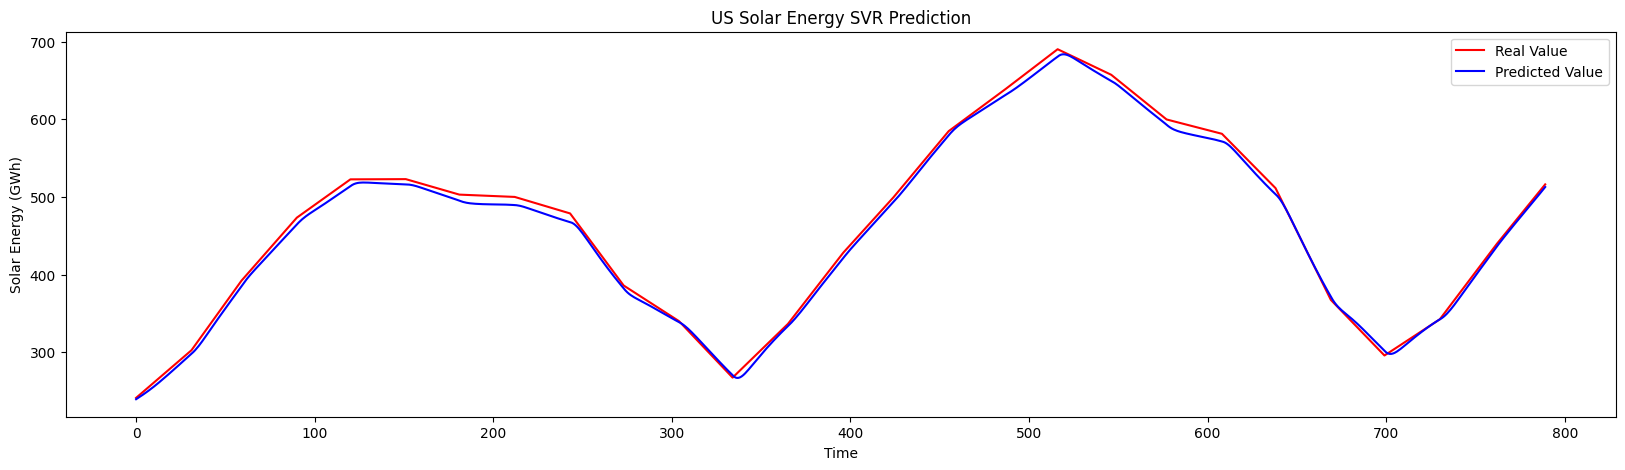

In [205]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(test['Value'].values, color='red', label='Real Value')
plt.plot(y_pred, color='blue', label='Predicted Value')
plt.title('US Solar Energy SVR Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy (GWh)')
plt.legend()
plt.show()

# Save Best Model

In [141]:
us_daily_gru.save("us_solar_best_gru.h5")

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
